In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import os
import modules.utils as Utils
import re

from collections import Counter
from textblob import TextBlob
from underthesea import word_tokenize
from typing import List

# 1. Đọc dữ liệu

In [3]:
reviews = pd.read_csv("../00. Data Scraping/data/reviews.csv")

# 2. Xóa các mẫu chứa URL

In [4]:
reviews['contain_url'] = reviews['raw_comment'].apply(lambda comment: 1 if Utils.containsURL(comment.lower()) else 0)

In [5]:
reviews = reviews[reviews['contain_url'] == 0]
reviews = reviews.drop(columns=['contain_url']).reset_index(drop=True)

In [6]:
reviews

,raw_comment,label
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1
...,...,...
277584,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0
277585,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0
277586,Cũng ổn nhìn hay hay,0
277587,"nhỏ xíu , ship 2 tuần , thất vọng",-1


# 3. Tạo cột `preprocess_comment`

In [7]:
reviews['processing_comment'] = reviews['raw_comment'].apply(lambda comment: Utils.createPreprocessColumn(comment))

In [8]:
reviews

,raw_comment,label,processing_comment
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1,welcome to seawheat life store hapy shoping ki...
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá oke ngoài sức mong đợi luôn ạ q...
...,...,...,...
277584,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...
277585,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...
277586,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay
277587,"nhỏ xíu , ship 2 tuần , thất vọng",-1,nhỏ xíu ship tuần thất vọng


# 4. Xóa các mẫu chỉ chứa mỗi comment là `ok`

In [9]:
reviews = reviews.loc[reviews['raw_comment'] != "ok"]
reviews = reviews.reset_index(drop=True)

In [10]:
reviews

,raw_comment,label,processing_comment
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1,welcome to seawheat life store hapy shoping ki...
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá oke ngoài sức mong đợi luôn ạ q...
...,...,...,...
277295,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...
277296,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...
277297,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay
277298,"nhỏ xíu , ship 2 tuần , thất vọng",-1,nhỏ xíu ship tuần thất vọng


# 5. Xóa các mẫu mà chữ IN HOA chiếm quá 50% độ dài của comment (khả năng cao là quảng cáo)

In [11]:
reviews['contain_adv'] = reviews['raw_comment'].apply(lambda comment: 1 if Utils.containAdvertisement(comment) else 0)

In [12]:
reviews = reviews[reviews['contain_adv'] == 0]
reviews = reviews.drop(columns=['contain_adv']).reset_index(drop=True)

In [13]:
reviews

,raw_comment,label,processing_comment
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...
2,♛Welcome to SeaWheat Life Store!♛\n⚡✨ Happy sh...,1,welcome to seawheat life store hapy shoping ki...
3,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...
4,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá oke ngoài sức mong đợi luôn ạ q...
...,...,...,...
273832,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...
273833,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...
273834,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay
273835,"nhỏ xíu , ship 2 tuần , thất vọng",-1,nhỏ xíu ship tuần thất vọng


# 6. Xóa các dòng không phải tiếng việt

In [14]:
syllables = Utils.loadSyllables()

In [15]:
reviews['language'] = reviews['raw_comment'].apply(lambda comment: 1 if Utils.isVietnamese(comment, syllables) else 0)

In [16]:
reviews = reviews[reviews['language'] == 1]
reviews = reviews.drop(columns=['language']).reset_index(drop=True)

In [17]:
reviews

,raw_comment,label,processing_comment
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá oke ngoài sức mong đợi luôn ạ q...
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa nhận được hàng ưng quá phải fedback ngay v...
...,...,...,...
255623,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...
255624,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...
255625,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay
255626,"nhỏ xíu , ship 2 tuần , thất vọng",-1,nhỏ xíu ship tuần thất vọng


# 7. Extract emoji

In [18]:
reviews['emoji'] = reviews['raw_comment'].apply(lambda comment: Utils.extractEmoji(comment))

In [19]:
reviews

,raw_comment,label,processing_comment,emoji
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...,
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...,❤️ 👍
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...,
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá oke ngoài sức mong đợi luôn ạ q...,
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa nhận được hàng ưng quá phải fedback ngay v...,
...,...,...,...,...
255623,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...,
255624,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...,
255625,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay,
255626,"nhỏ xíu , ship 2 tuần , thất vọng",-1,nhỏ xíu ship tuần thất vọng,


# 8. Chỉnh sửa vài từ viết tắt cơ bản và xóa các từ vô nghĩa

In [20]:
abbreviates = Utils.loadAbbreviates()

In [21]:
reviews['processing_comment'] = reviews['processing_comment'].apply(lambda comment: Utils.standardReview(comment, abbreviates, syllables))

In [22]:
reviews

,raw_comment,label,processing_comment,emoji
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...,
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...,❤️ 👍
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...,
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá ok ngoài sức mong đợi luôn ạ qu...,
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa nhận được hàng ưng quá phải phản hồi ngay ...,
...,...,...,...,...
255623,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...,
255624,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...,
255625,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay,
255626,"nhỏ xíu , ship 2 tuần , thất vọng",-1,nhỏ xíu ship tuần thất vọng,


# 9. Tạo cột boostword 

In [23]:
boostwords = Utils.loadBoostWords()

In [24]:
reviews['boost_words'] = reviews['processing_comment'].apply(lambda comment: Utils.extractBoostWords(comment, boostwords))

In [25]:
reviews

,raw_comment,label,processing_comment,emoji,boost_words
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...,,phù_hợp mua_nha nên_mua hàng_đẹp chắc_chắn sản...
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...,❤️ 👍,đẹp_lắm rất_đẹp chắc_chắn
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...,,khá_xinh thiếu_hàng chất_lượng_quá_tuyệt_vời
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá ok ngoài sức mong đợi luôn ạ qu...,,quá_đẹp chất_lượng_quá_ok ngoài_sức_mong_đợi
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa nhận được hàng ưng quá phải phản hồi ngay ...,,ưng_quá
...,...,...,...,...,...
255623,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...,,như_hình giao_hàng_quá_chậm
255624,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...,,tạm_ổn chất_vải thời_gian_giao_hàng_dài
255625,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay,,cũng_ổn
255626,"nhỏ xíu , ship 2 tuần , thất vọng",-1,nhỏ xíu ship tuần thất vọng,,thất_vọng


# 10. Loại bỏ các duplicate samples 

In [26]:
stopwords = Utils.loadStopwords()

In [27]:
reviews['comment'] = reviews.apply(lambda row: Utils.combine(row['processing_comment'], row['boost_words'], row['emoji'], stopwords), axis=1)

In [28]:
reviews = reviews.drop_duplicates(subset=['comment'])

In [29]:
reviews = reviews[reviews['comment'].str.lower() != ""]
reviews = reviews.drop(columns=['comment'])
reviews = reviews.reset_index(drop=True)

In [30]:
reviews

,raw_comment,label,processing_comment,emoji,boost_words
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...,,phù_hợp mua_nha nên_mua hàng_đẹp chắc_chắn sản...
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...,❤️ 👍,đẹp_lắm rất_đẹp chắc_chắn
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...,,khá_xinh thiếu_hàng chất_lượng_quá_tuyệt_vời
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá ok ngoài sức mong đợi luôn ạ qu...,,quá_đẹp chất_lượng_quá_ok ngoài_sức_mong_đợi
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa nhận được hàng ưng quá phải phản hồi ngay ...,,ưng_quá
...,...,...,...,...,...
203919,trên ảnh miếng da màu đen nhưng giao miếng da ...,-1,trên ảnh miếng da màu đen nhưng giao miếng da ...,,không_nên_mua
203920,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...,,như_hình giao_hàng_quá_chậm
203921,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...,,tạm_ổn chất_vải thời_gian_giao_hàng_dài
203922,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay,,cũng_ổn


In [31]:
Counter(reviews['label'])

Counter({1: 189451, 0: 11191, -1: 3282})

# 11. Loại bỏ `boost_words` và `stopwords` khỏi `processing_comment`

In [32]:
reviews['remaining_comment'] = reviews.apply(lambda row: Utils.removeBoostwords(row['processing_comment'], row['boost_words'], stopwords), axis=1)

In [33]:
reviews

,raw_comment,label,processing_comment,emoji,boost_words,remaining_comment
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...,,phù_hợp mua_nha nên_mua hàng_đẹp chắc_chắn sản...,nên người shop với đóng gói và shop sau shop lắm
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...,❤️ 👍,đẹp_lắm rất_đẹp chắc_chắn,đóng gói sản phẩm và sản phẩm và ạ được với nữ...
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...,,khá_xinh thiếu_hàng chất_lượng_quá_tuyệt_vời,nha với shop có nhưng đã
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá ok ngoài sức mong đợi luôn ạ qu...,,quá_đẹp chất_lượng_quá_ok ngoài_sức_mong_đợi,luôn ạ luôn nhìn cũng
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa nhận được hàng ưng quá phải phản hồi ngay ...,,ưng_quá,được hàng và luôn hàng như luôn nha người đóng...
...,...,...,...,...,...,...
203919,trên ảnh miếng da màu đen nhưng giao miếng da ...,-1,trên ảnh miếng da màu đen nhưng giao miếng da ...,,không_nên_mua,màu đen nhưng giao nói chung là này mua thì ra...
203920,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...,,như_hình giao_hàng_quá_chậm,có hàng sản phẩm thì
203921,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...,,tạm_ổn chất_vải thời_gian_giao_hàng_dài,với này thì ok
203922,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay,,cũng_ổn,nhìn


# 12. Tokenize

In [34]:
def undertheseaTokenize(pText):
    return " ".join([re.sub(" ", "_", word) for word in word_tokenize(str(pText))])

In [35]:
reviews['tokenize'] = reviews['remaining_comment'].apply(lambda comment: undertheseaTokenize(comment))

In [36]:
reviews

,raw_comment,label,processing_comment,emoji,boost_words,remaining_comment,tokenize
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...,,phù_hợp mua_nha nên_mua hàng_đẹp chắc_chắn sản...,nên người shop với đóng gói và shop sau shop lắm,nên người shop với đóng_gói và shop sau shop lắm
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...,❤️ 👍,đẹp_lắm rất_đẹp chắc_chắn,đóng gói sản phẩm và sản phẩm và ạ được với nữ...,đóng gói sản_phẩm và sản_phẩm và ạ được với nữ...
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...,,khá_xinh thiếu_hàng chất_lượng_quá_tuyệt_vời,nha với shop có nhưng đã,nha với shop có nhưng đã
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá ok ngoài sức mong đợi luôn ạ qu...,,quá_đẹp chất_lượng_quá_ok ngoài_sức_mong_đợi,luôn ạ luôn nhìn cũng,luôn ạ luôn nhìn cũng
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa nhận được hàng ưng quá phải phản hồi ngay ...,,ưng_quá,được hàng và luôn hàng như luôn nha người đóng...,được hàng và luôn hàng như luôn nha người đóng...
...,...,...,...,...,...,...,...
203919,trên ảnh miếng da màu đen nhưng giao miếng da ...,-1,trên ảnh miếng da màu đen nhưng giao miếng da ...,,không_nên_mua,màu đen nhưng giao nói chung là này mua thì ra...,màu đen nhưng giao nói_chung là này mua thì_ra...
203920,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...,,như_hình giao_hàng_quá_chậm,có hàng sản phẩm thì,có hàng sản_phẩm thì
203921,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...,,tạm_ổn chất_vải thời_gian_giao_hàng_dài,với này thì ok,với này thì ok
203922,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay,,cũng_ổn,nhìn,nhìn


# 13. Kết hợp 3 cột lại `boost_words`, `tokenize` và `emoji` lại với nhau

In [37]:
reviews['standard_comment'] = reviews.apply(lambda row: Utils.combine2(row['boost_words'], row['tokenize'], row['emoji']), axis=1)

In [38]:
reviews

,raw_comment,label,processing_comment,emoji,boost_words,remaining_comment,tokenize,standard_comment
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,1,hàng đẹp y ảnh nên mua nha mọi người shop giao...,,phù_hợp mua_nha nên_mua hàng_đẹp chắc_chắn sản...,nên người shop với đóng gói và shop sau shop lắm,nên người shop với đóng_gói và shop sau shop lắm,phù_hợp mua_nha nên_mua hàng_đẹp chắc_chắn sản...
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,1,đóng gói sản phẩm rất đẹp và chắc chắn sản phẩ...,❤️ 👍,đẹp_lắm rất_đẹp chắc_chắn,đóng gói sản phẩm và sản phẩm và ạ được với nữ...,đóng gói sản_phẩm và sản_phẩm và ạ được với nữ...,đẹp_lắm rất_đẹp chắc_chắn đóng gói sản_phẩm và...
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",1,khá xinh nha các bạn chất lượng quá tuyệt vời ...,,khá_xinh thiếu_hàng chất_lượng_quá_tuyệt_vời,nha với shop có nhưng đã,nha với shop có nhưng đã,khá_xinh thiếu_hàng chất_lượng_quá_tuyệt_vời n...
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,1,chất lượng quá ok ngoài sức mong đợi luôn ạ qu...,,quá_đẹp chất_lượng_quá_ok ngoài_sức_mong_đợi,luôn ạ luôn nhìn cũng,luôn ạ luôn nhìn cũng,quá_đẹp chất_lượng_quá_ok ngoài_sức_mong_đợi l...
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,1,vừa nhận được hàng ưng quá phải phản hồi ngay ...,,ưng_quá,được hàng và luôn hàng như luôn nha người đóng...,được hàng và luôn hàng như luôn nha người đóng...,ưng_quá được hàng và luôn hàng như luôn nha ng...
...,...,...,...,...,...,...,...,...
203919,trên ảnh miếng da màu đen nhưng giao miếng da ...,-1,trên ảnh miếng da màu đen nhưng giao miếng da ...,,không_nên_mua,màu đen nhưng giao nói chung là này mua thì ra...,màu đen nhưng giao nói_chung là này mua thì_ra...,không_nên_mua màu đen nhưng giao nói_chung là ...
203920,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,0,giao hàng quá chậm ngày mới có hàng sản phẩm t...,,như_hình giao_hàng_quá_chậm,có hàng sản phẩm thì,có hàng sản_phẩm thì,như_hình giao_hàng_quá_chậm có hàng sản_phẩm thì
203921,Thời gian giao hàng dài. Chất vải tạm ổn với g...,0,thời gian giao hàng dài chất vải tạm ổn với gi...,,tạm_ổn chất_vải thời_gian_giao_hàng_dài,với này thì ok,với này thì ok,tạm_ổn chất_vải thời_gian_giao_hàng_dài với nà...
203922,Cũng ổn nhìn hay hay,0,cũng ổn nhìn hay hay,,cũng_ổn,nhìn,nhìn,cũng_ổn nhìn


# 14. Xóa các cột thừa đi

In [39]:
reviews = reviews.drop(columns=['emoji', 'processing_comment', 'boost_words', 'tokenize', "remaining_comment"])
reviews = reviews[reviews['standard_comment'].str.lower() != ""]
reviews = reviews.reset_index(drop=True)

In [40]:
reviews = reviews.reindex(columns=['raw_comment', 'standard_comment', 'label'])

In [41]:
reviews

,raw_comment,standard_comment,label
0,Hàng đẹp y ảnh. Nên mua nha mọi người. Shop gi...,phù_hợp mua_nha nên_mua hàng_đẹp chắc_chắn sản...,1
1,Đóng gói sản phẩm rất đẹp và chắc chắn. Sản ph...,đẹp_lắm rất_đẹp chắc_chắn đóng gói sản_phẩm và...,1
2,"Khá xinh nha các bạn, chất lượng quá tuyệt vời...",khá_xinh thiếu_hàng chất_lượng_quá_tuyệt_vời n...,1
3,Chất lượng quá oke ngoài sức mong đợi luôn ạ q...,quá_đẹp chất_lượng_quá_ok ngoài_sức_mong_đợi l...,1
4,Vừa nhận được hàng ưng quá phải feedback ngay ...,ưng_quá được hàng và luôn hàng như luôn nha ng...,1
...,...,...,...
201350,trên ảnh miếng da màu đen nhưng giao miếng da ...,không_nên_mua màu đen nhưng giao nói_chung là ...,-1
201351,Giao hàng quá chậm. 10 ngày mới có hàng. Sản p...,như_hình giao_hàng_quá_chậm có hàng sản_phẩm thì,0
201352,Thời gian giao hàng dài. Chất vải tạm ổn với g...,tạm_ổn chất_vải thời_gian_giao_hàng_dài với nà...,0
201353,Cũng ổn nhìn hay hay,cũng_ổn nhìn,0


In [42]:
Counter(reviews['label'])

Counter({1: 187102, 0: 11014, -1: 3239})

# 15. Ghi ra file

In [43]:
reviews.to_csv("./data/standard_reviews.csv", index=False)

In [44]:
sen_neg = " ".join(reviews[reviews['label'] == -1]['standard_comment'].to_list())

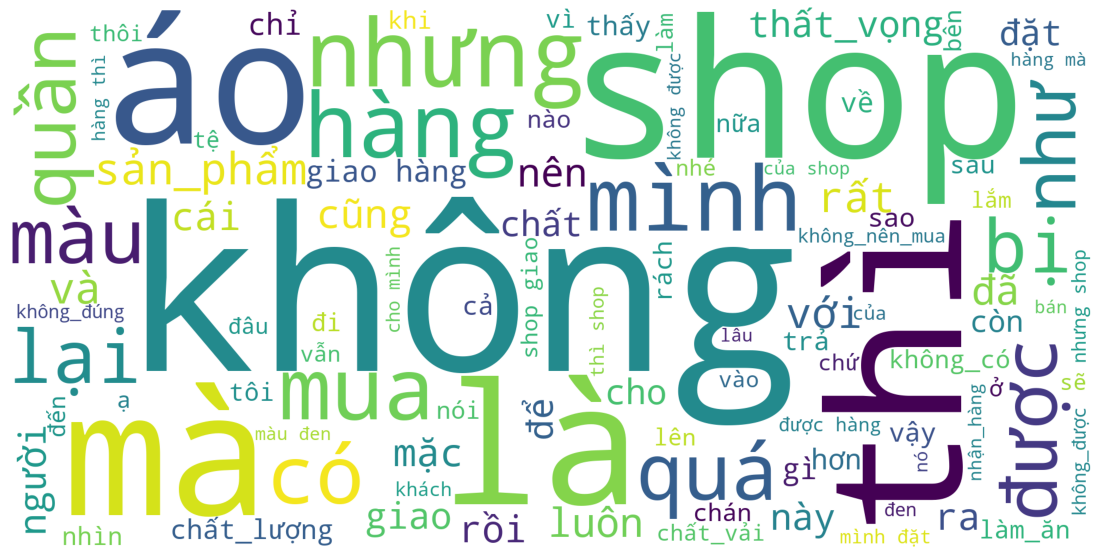

In [45]:
Utils.drawWordCloud(sen_neg)

In [46]:
neg = reviews[reviews['label'] == -1].copy()

In [47]:
neg['mark'] = neg['raw_comment'].apply(lambda comment: Utils.findBoostWords(comment, "không", boostwords))

In [48]:
tmp = neg[neg['mark'] == 1]

In [49]:
tmp.to_csv("tmp.csv")

In [50]:
os.system("vlc ../misc/signal.mp3")

0